In [2]:
import lstm

SEQ_LEN=15

Using TensorFlow backend.


In [3]:
# get Microsoft's stock opening prices and create list of 15 day frames
times = lstm.get_time_series_daily("AAPL", filters=["1. open"], outputsize="full")
# times = lstm.get_time_series_daily("MSFT", filters=["4. close", "5. volume"], outputsize="full")
# times are returned descending from most recent so should be reversed
vectors = lstm.times_to_vectors(times)[::-1]
frames = lstm.get_frames(vectors, seq_len=SEQ_LEN, with_target=True) # each frame is 15+1 (trend length + prediction target) vectors

print(f"last frame: {frames[-1]}")
print(f"last target frame: {frames[-1][-1]}")

last frame: [['170.1000'], ['171.3900'], ['169.7100'], ['171.2500'], ['169.7100'], ['171.1900'], ['171.8000'], ['171.5800'], ['174.1600'], ['173.7100'], ['173.2100'], ['174.3200'], ['174.2800'], ['175.6900'], ['175.9400'], ['174.6700']]
last target frame: ['174.6700']


In [4]:
# seperate normalized frames into training and testing data
train, test = lstm.partition_data(frames, partition_coefficient=0.8)
# split training and testing data into sequences and their targets
train_x, train_y = lstm.seperate_xy(lstm.normalize_frames(train))
# train_y = [[target[0]] for target in train_y]

test_x, test_y = lstm.seperate_xy(lstm.normalize_frames(test))
# test_y = [[target[0]] for target in test_y]

print(f"training sequence 1: {train_x[0]}, target: {train_y[0]}")
print(f"testing sequence 1: {test_x[0]}, target: {test_y[0]}")

training sequence 1: [[0.0], [0.00040401358682728983], [-0.006425845728441626], [-0.011448236851817062], [-0.013655718496014657], [0.000878103604373015], [-0.002677571527220368], [0.004552301240352774], [0.008107976371946268], [-0.014618713844154474], [-0.012040849373749274], [0.00354485995306808], [0.022189931424360543], [0.03610891803324345], [0.03689412962480354]], target: [0.03745711152063924]
testing sequence 1: [[0.0], [-0.004591129591129617], [0.017931392931392898], [0.01221413721413711], [0.031444906444906495], [0.021656271656271597], [0.03317740817740811], [0.029192654192654155], [-0.01680526680526684], [0.002685377685377688], [0.0028586278586277825], [0.0047643797643797114], [-0.011607761607761669], [-0.04547817047817049], [-0.00892238392238398]], target: [-0.02754677754677748]


In [5]:
# create LSTM model using the training data
model = lstm.setup_lstm_model(train_x, train_y)
print(model)

compilation time :  0.10090208053588867
Train on 4035 samples, validate on 213 samples
Epoch 1/1
4035/4035 [==============================] - 2s 455us/step - loss: 0.0107 - val_loss: 0.0072


In [6]:
# predict results using the test data
predictions = lstm.predict_sequences_multiple(model, test_x)

final sequence: [[0.0], [0.007583774250440767], [-0.0022927689594355316], [0.006760728982951214], [-0.0022927689594355316], [0.006407995296884295], [0.009994121105232345], [0.008700764256319937], [0.023868312757201693], [0.02122281011169913], [0.018283362727807173], [0.02480893592004696], [0.024573780129335754], [0.03286302175191058], [0.03433274544385667]]
predicted: [-0.00411953]
actual: [0.026866549088771174]


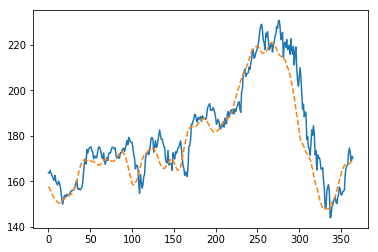

Next predicted normalized value:
current: 174.6700
next predicted: 169.72589936820788


In [7]:
print(f"final sequence: {test_x[-1]}")
print(f"predicted: {predictions[-1]}")
print(f"actual: {test_y[-1]}")
# plot the results of the last month
# (dashed line is prediction)
lstm.plot_results_multiple(predictions[-365:], test[-365:])

# get next prediction:
next_seq = frames[-1][-SEQ_LEN:]
current_val = next_seq[-1]
next_predicted = lstm.predict_sequences_multiple(model, [lstm.normalize_frame(next_seq)])
print("Next predicted normalized value:")
print(f"current: {current_val[0]}")
print(f"next predicted: {lstm.denormalize_dim(next_predicted[0][0], next_seq[0][0])}")